## Imports

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


## Global Variables

In [59]:
#read file into data frame
df = pd.read_csv("data/15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv", parse_dates=["Date"])

### Files Information
(Remove later)
Used as a example to visualize rows and columns of the csv file.

In [60]:
df.head()

,Date,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
0,2010-01-04,6.440330,6.6950,15.609805,23.254051,0.423884,6.455075,6.8305,15.678546,23.366752,...,6.422875,6.8125,15.614786,23.006108,0.424342,493729600,151998000,78169752,38409100,800204000
1,2010-01-05,6.451465,6.7345,15.541064,23.261557,0.430073,6.487878,6.7740,15.636953,23.366746,...,6.458086,6.6715,15.620515,23.178910,0.422279,601904800,177038000,120067812,49749600,728648000
2,2010-01-06,6.348847,6.6125,15.149294,23.118809,0.432824,6.477046,6.7365,15.587638,23.351725,...,6.451466,6.7300,15.587638,23.201455,0.429844,552160000,143576000,158988852,58182400,649168000
3,2010-01-07,6.337109,6.5000,14.796624,22.878376,0.424342,6.379842,6.6160,15.192630,23.066212,...,6.372319,6.6005,15.177685,23.013616,0.430532,477131200,220604000,256315428,50559700,547792000
4,2010-01-08,6.379242,6.6760,14.993881,23.036165,0.425259,6.379844,6.6840,15.024515,23.201460,...,6.328685,6.5280,14.744323,22.750656,0.420903,447610800,196610000,188783028,51197400,478168000


In [61]:
closing_price_cols = ["Close_AAPL", "Close_AMZN", "Close_GOOGL", "Close_MSFT", "Close_NVDA"]
df["Year"] = df["Date"].dt.year
aar = df.groupby("Year")[closing_price_cols].last().pct_change()*100
print(aar)

      Close_AAPL  Close_AMZN  Close_GOOGL  Close_MSFT  Close_NVDA
Year                                                             
2010         NaN         NaN          NaN         NaN         NaN
2011   25.558048   -3.833336     8.742869   -4.515648   -9.999972
2012   32.566846   44.927791     9.518499    5.798873  -10.973349
2013    8.069542   58.962817    58.431111   44.297972   33.523812
2014   40.622514  -22.177089    -5.394015   27.564580   27.395780
2015   -3.013741  117.783139    46.611750   22.691886   67.115579
2016   12.480440   10.945572     1.856033   15.077729  226.960263
2017   48.464322   55.956365    32.929508   40.730630   81.987878
2018   -5.390194   28.431690    -0.801212   20.795297  -30.815242
2019   88.957830   23.027750    28.176189   57.558085   76.943062
2020   82.306758   76.256061    30.853626   42.534088  122.295636
2021   34.648170    2.376777    65.295776   52.476939  125.482111
2022  -26.404204  -49.615215   -39.089557  -28.024764  -50.264646
2023   49.

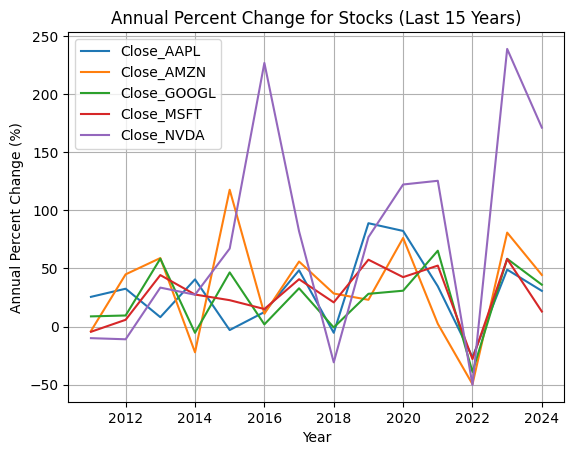

In [62]:
for stock in closing_price_cols:
    plt.plot(aar.index, aar[stock], label=stock)
plt.xlabel("Year")
plt.ylabel("Annual Percent Change (%)")
plt.title("Annual Percent Change for Stocks (Last 15 Years)")
plt.legend()
plt.grid()
plt.show()

## Functions

## Main Funciton

In [63]:
def main():
    pass

if __name__ == "__main__":
    main()